# Universidad Pública de El Alto  
## Maestría en Inteligencia Artificial, Machine Learning y Ciencia de Datos  
### Módulo 2 - Procesamiento Masivo de Datos  

---

## 📝 Tarea Unidad #2

**Maestrante:** Alvaro Iporre Martinez  

---

Para la realización de la siguiente práctica se ha utilizado **Jupyter Notebook**, ya que tiene bastante similitud con **Google Colab**, y también se ha optado por esta decisión para generar un **entorno aislado de desarrollo usando contenedores**.

🔗 **Repositorio para utilizar este entorno:**  
[https://github.com/alvaroiporre/ia-environment](https://github.com/alvaroiporre/ia-environment)


In [1]:
# Importamos las librerias que utilizaremos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leemos el dataset con los datos del banco
data = pd.read_csv('../datasets/dataset_banco.csv')

print(data.shape)

(45215, 17)


In [2]:
# Mostramos los datos que contiene el dataset ahora en la variable data
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [3]:
# Obtenemos la informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [7]:
# Eliminamos datos faltantes
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [9]:
# Obtenemos las columnas que contienen datos categoricos

# categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
categorical_columns = data.select_dtypes(exclude=['number']).columns.tolist()

print(categorical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [11]:
# Analizamos los valores distintos que almacena cada columna
for col in categorical_columns:
    sublevels = data[col].unique()
    cantidad = data[col].nunique()
    print(f"Columna: {col}")
    print(f"Subniveles ({cantidad}): {sublevels}")
    print("-" * 100)

Columna: job
Subniveles (18): ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'Management' 'retired' 'admin.' 'services' 'self-employed' 'MANAGEMENT'
 'Self-employed' 'unemployed' 'housemaid' 'student' 'Services' 'Retired'
 'administrative']
----------------------------------------------------------------------------------------------------
Columna: marital
Subniveles (6): ['married' 'single' 'div.' 'divorced' 'DIVORCED' 'Single']
----------------------------------------------------------------------------------------------------
Columna: education
Subniveles (10): ['tertiary' 'secondary' 'unknown' 'primary' 'SECONDARY' 'Secondary'
 'Primary' 'sec.' 'Tertiary' 'UNK']
----------------------------------------------------------------------------------------------------
Columna: default
Subniveles (2): ['no' 'yes']
----------------------------------------------------------------------------------------------------
Columna: housing
Subniveles (2): ['yes' 'no']
-----------

In [16]:
# Obtenemos un resumen estadistico rapido de las columnas con datos numerales del dataset
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000,45203.000000
mean,41.005177,1373.893967,15.807115,258.039754,2.763843,40.177709,0.580138
std,12.037387,3923.852086,8.323018,257.470045,3.098168,100.104768,2.303344
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
print(f'tamaño del set antes de eliminar duplicados: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'tamaño del set despues de eliminar duplicados: {data.shape}')

tamaño del set antes de eliminar duplicados: (45203, 17)
tamaño del set despues de eliminar duplicados: (45203, 17)


In [17]:
# Obtenemos las columnas que almacenan datos numericos
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


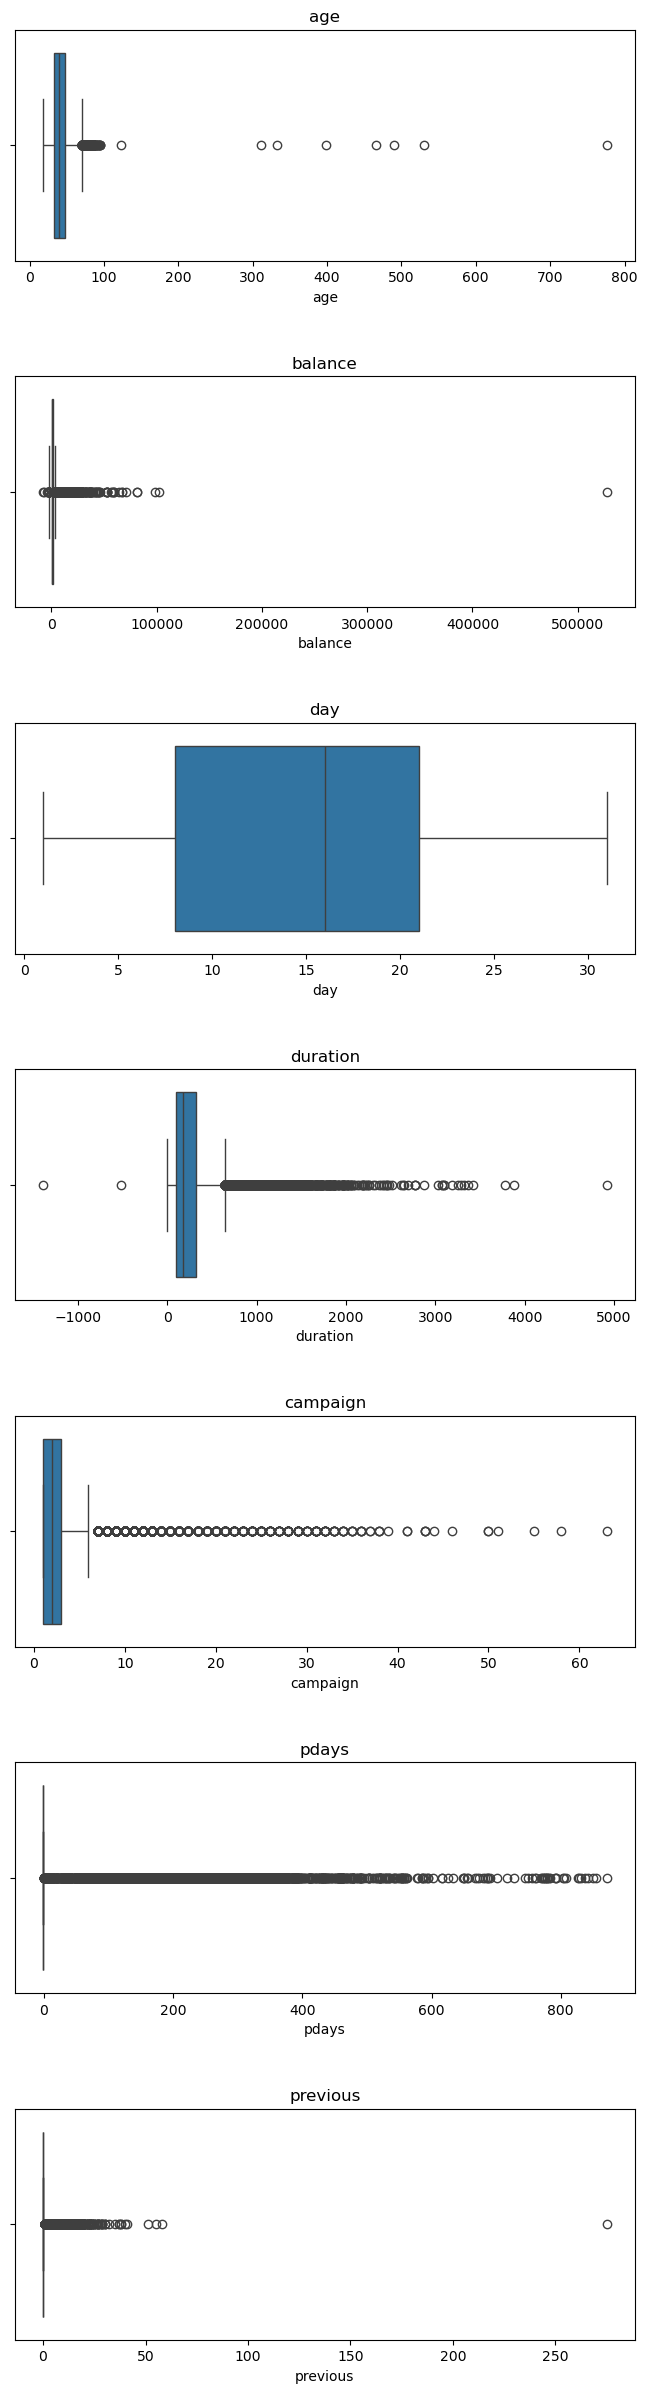

In [20]:
# Manejo de valores atípicos
# Para ver los  valores atípicos de cada columna usaremos los diagramas de cajas

fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(col)

In [21]:
# Eliminamos edades mayores a 100 años
print(f'tamaño del set antes de eliminar outliers en age: {data.shape}')
data = data[data['age'] <=100]
print(f'tamaño del set despues de eliminar outliers en age: {data.shape}')

tamaño del set antes de eliminar outliers en age: (45203, 17)
tamaño del set despues de eliminar outliers en age: (45195, 17)


In [22]:
# Eliminamos duracion negativa
print(f'tamaño del set antes de eliminar outliers en duration: {data.shape}')
data = data[data['duration'] > 0]
print(f'tamaño del set despues de eliminar outliers en duration: {data.shape}')

tamaño del set antes de eliminar outliers en duration: (45195, 17)
tamaño del set despues de eliminar outliers en duration: (45190, 17)


In [23]:
# Eliminamos el previous o las veces que la empresa haya llamado mas de 100 veces
print(f'tamaño del set antes de eliminar outliers en previous: {data.shape}')
data = data[data['previous'] <= 100]
print(f'tamaño del set despues de eliminar outliers en previous: {data.shape}')

tamaño del set antes de eliminar outliers en previous: (45190, 17)
tamaño del set despues de eliminar outliers en previous: (45189, 17)


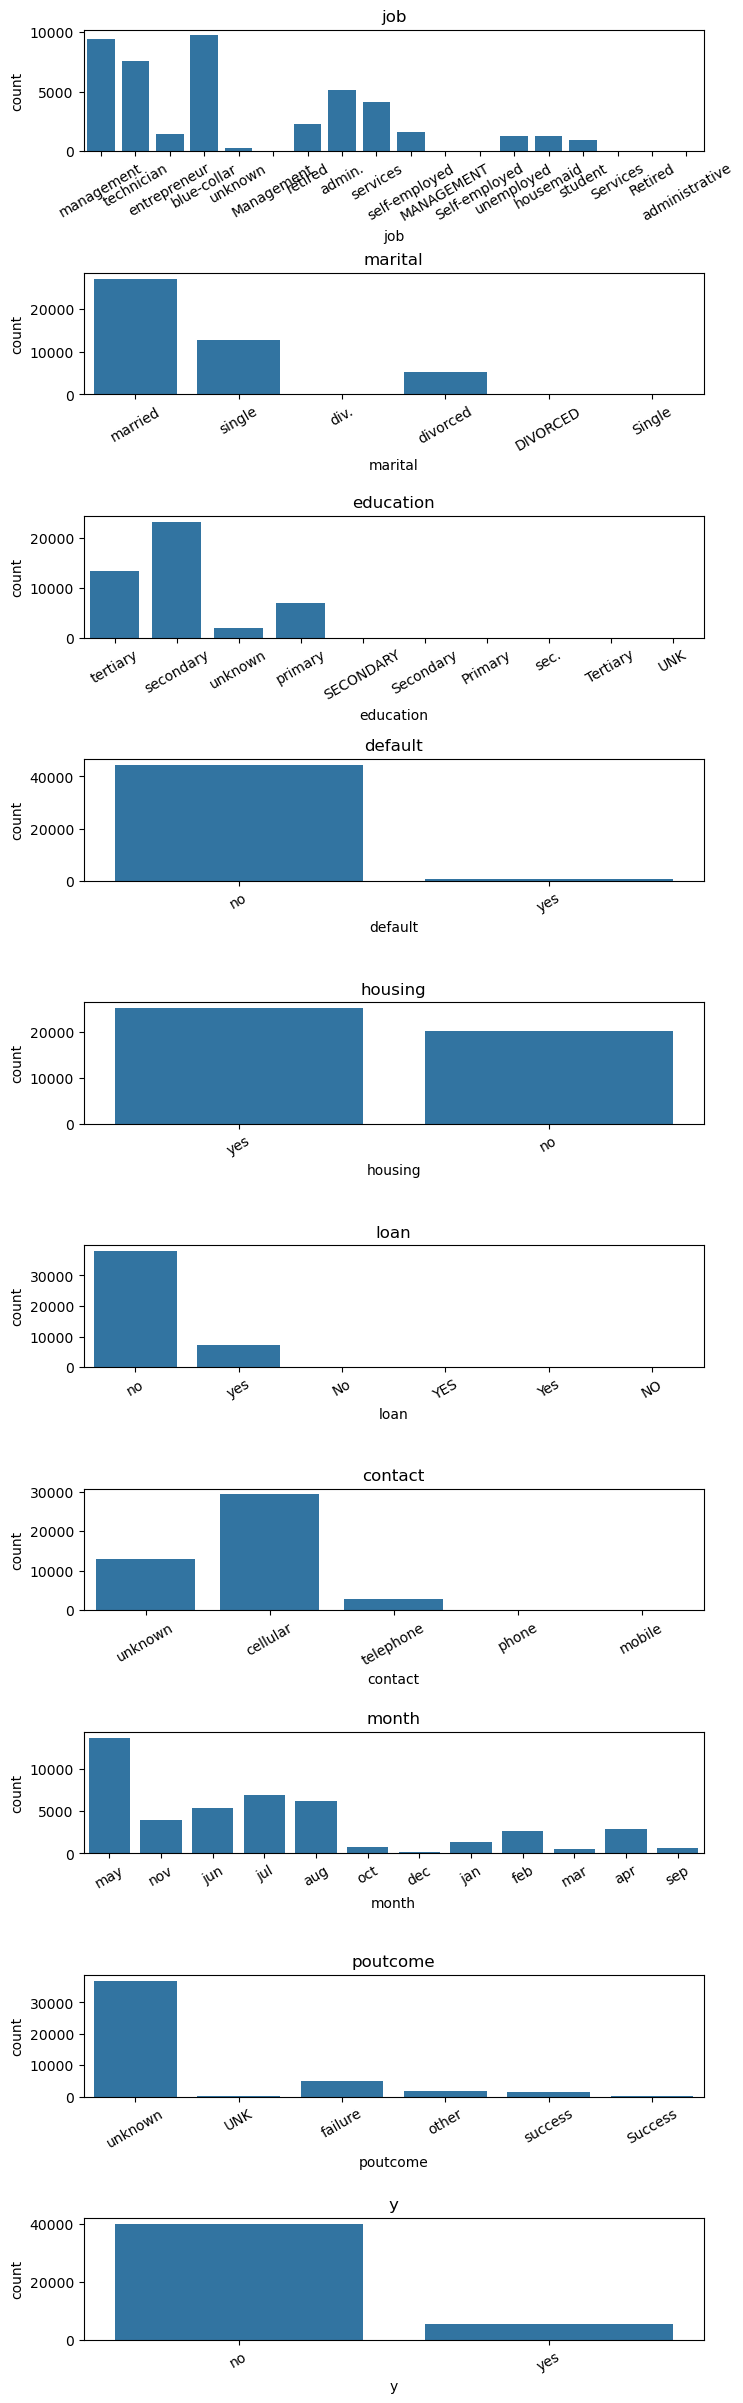

In [27]:
# Correccion de errores tipograficos o sus "EQUIVALENCIAS"
# Para ver los  valores de cada columna usaremos el grafico de conteo de categorias

fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=30)

    

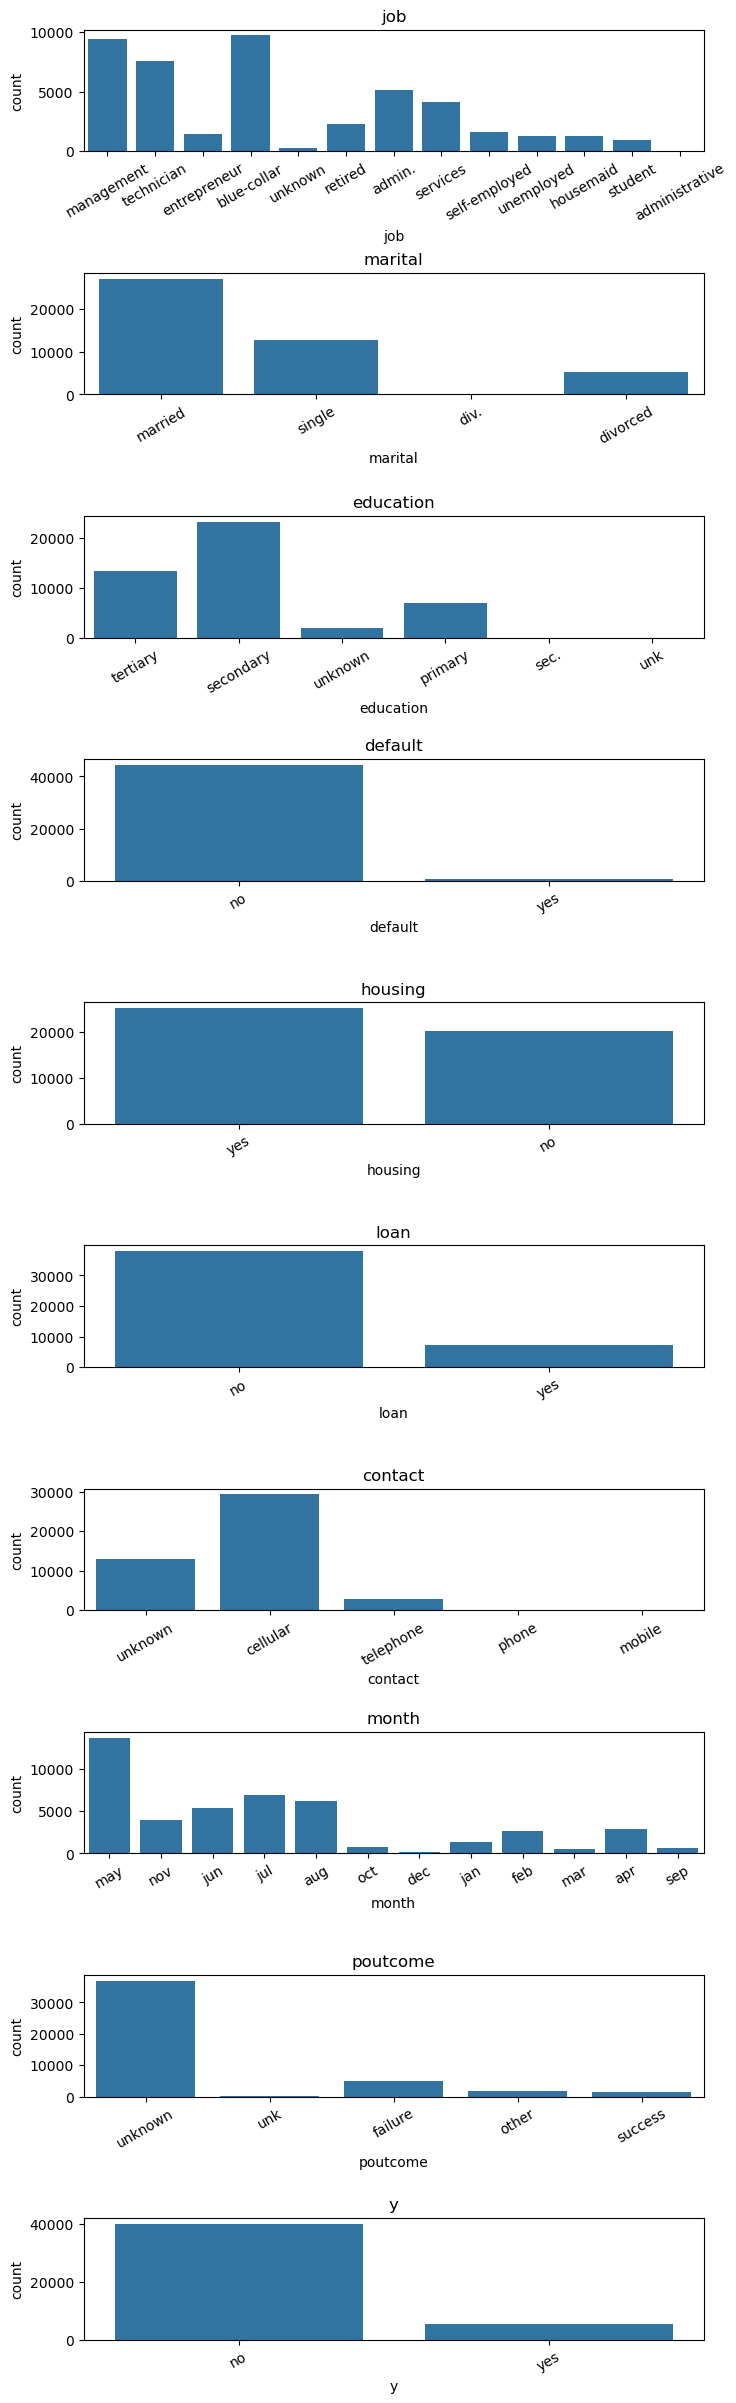

In [29]:
# Convertimos a minusculas todos las categorias existentes en el dataset
for col in categorical_columns:
    data[col] = data[col].str.lower()
    
fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=30)

In [30]:
# Eliminamos abreviaciones y variaciones de palabras

data['job'] = data['job'].replace({
    'admin.': 'administrative'
})

data['marital'] = data['marital'].replace({
    'div.': 'divorced'
})

data['education'] = data['education'].replace({
    'sec.': 'secondary',
    'unk': 'unknown'
})

data['contact'] = data['contact'].replace({
    'cellular': 'mobile',
    'telephone': 'phone'
})

data['poutcome'] = data['poutcome'].replace({
    'unk': 'unknown'
})

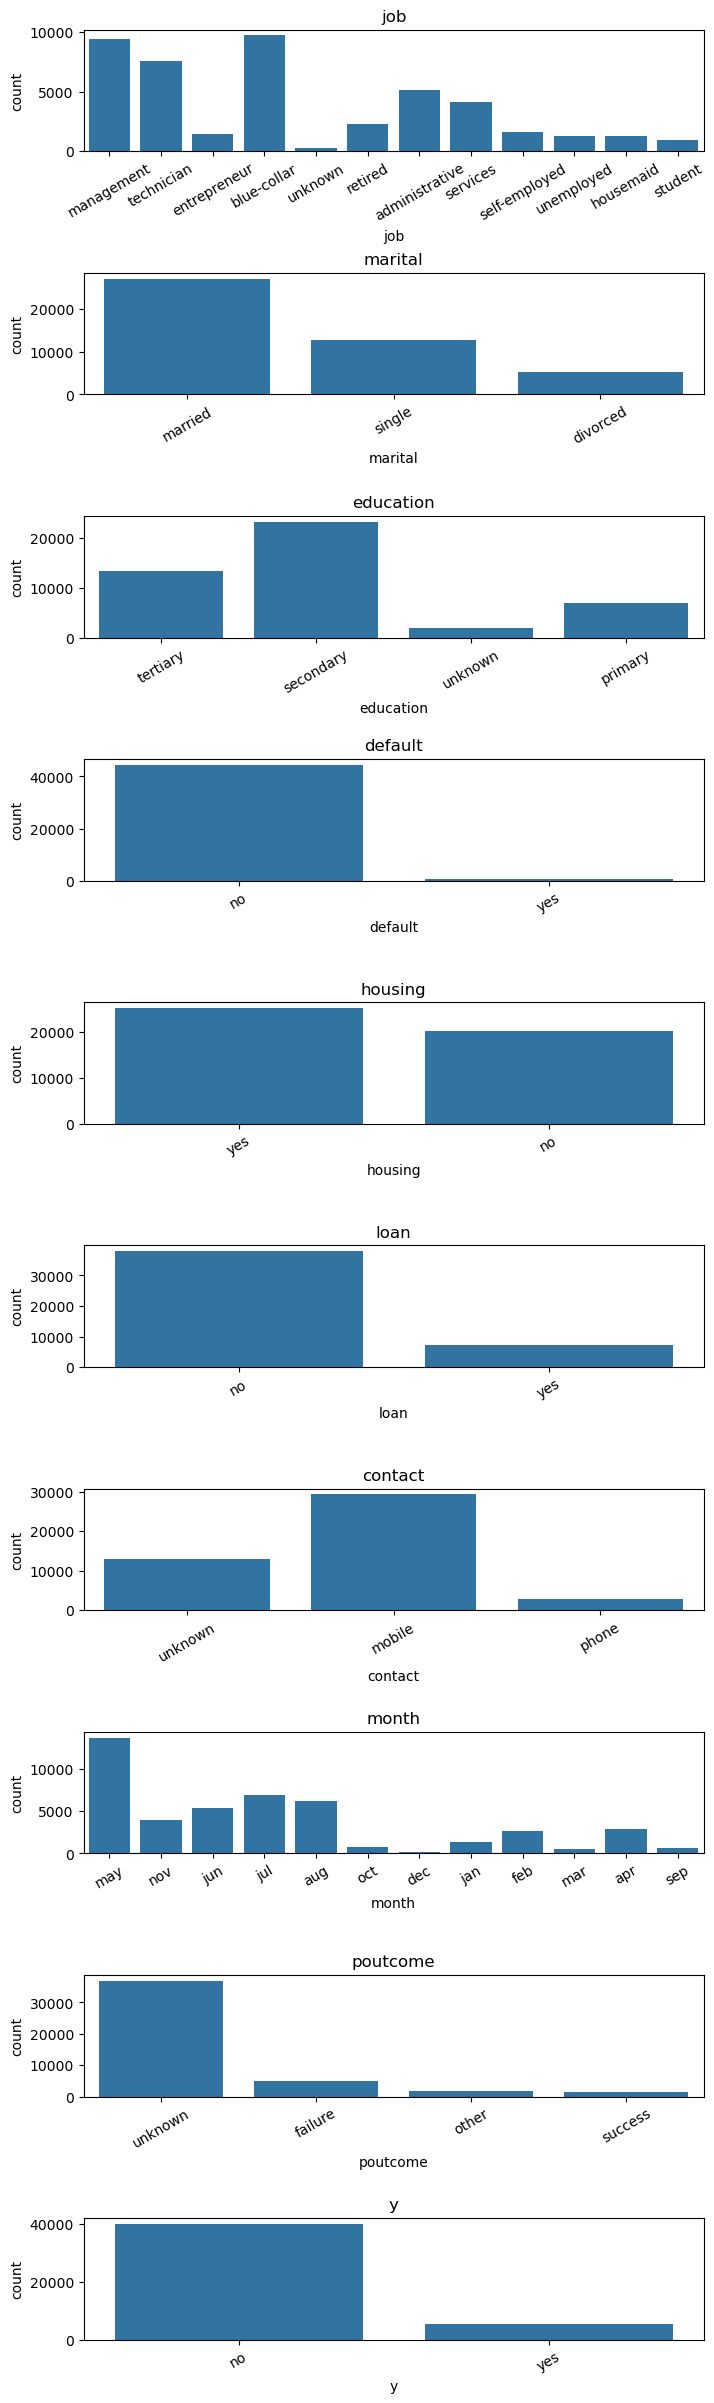

In [31]:
fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=30)